# Part1:

![STA365HW2PART1](sta365hw2part1.jpg)

# Part 2 question 1:

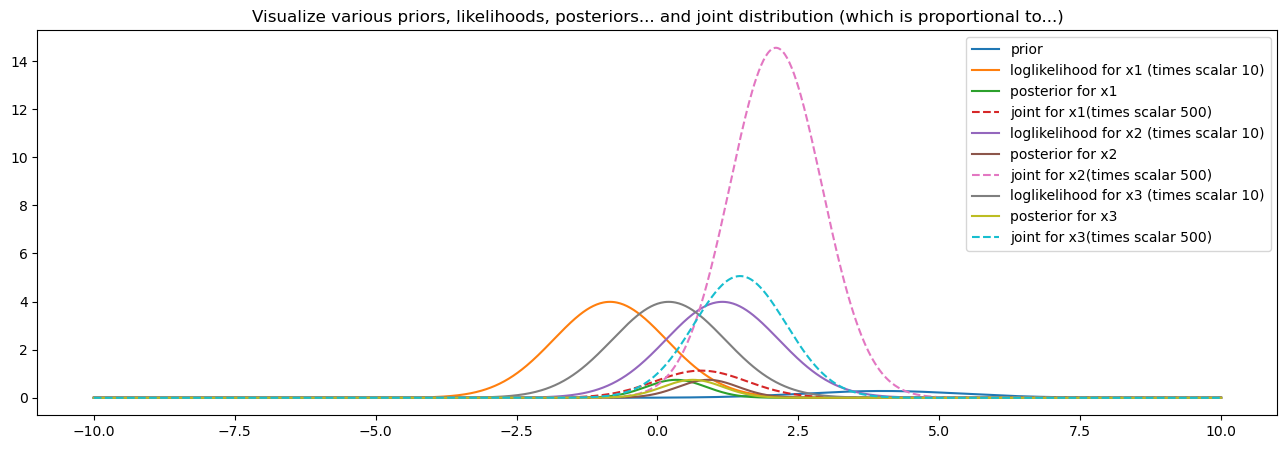

In [22]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
n = 3 
x = stats.norm(loc=0,scale=1).rvs(n) 
theta_0,tau = 4,1/2 
parameter_domain = np.linspace(-10,10,1001)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c,c2 = 500,10
plt.figure(figsize=(16,5))
i = 0
plt.plot(parameter_domain, prior, label="prior"); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
for xi in x:
    i += 1
    likelihood = stats.norm.pdf(xi, loc=parameter_domain, scale=1)# Calculate the likelihood for this observation
    joint = c*likelihood*prior # elementwise multiplication 
    posterior = stats.norm(loc=(tau*theta_0+xi)/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
    plt.plot(parameter_domain, c2*likelihood, label=f"loglikelihood for x{i} (times scalar "+str(c2)+")"); plt.plot(parameter_domain, posterior, label=f"posterior for x{i}"); plt.plot(parameter_domain, joint, linestyle="--", label=f"joint for x{i}(times scalar "+str(c)+")"); 
plt.legend()
plt.show()

# Part 2 question 2:

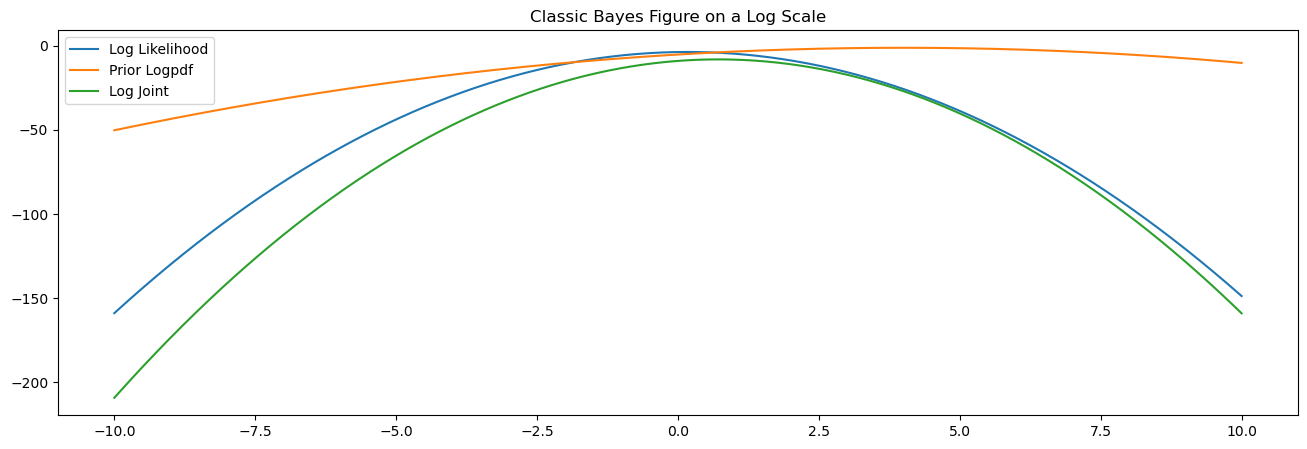

In [23]:
log_likelihood = np.sum(stats.norm.logpdf(x[:, np.newaxis], loc=parameter_domain, scale=1), axis=0)
prior_logpdf = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = log_likelihood + prior_logpdf
plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihood, label="Log Likelihood")
plt.plot(parameter_domain, prior_logpdf, label="Prior Logpdf")
plt.plot(parameter_domain, log_joint, label="Log Joint")
plt.legend()
plt.title("Classic Bayes Figure on a Log Scale")
plt.show()

# Part 2 question 3:
---


$p(\theta) \propto 1$ means that prior is constant and uniform, all values of $\theta $ are considered equally likely before observing the data. From $ p(\theta|x) \propto p(\theta,x) = p(x|\theta)p(\theta) $ ,we can know that $ p(\theta|x) \propto p(x|\theta) $. The posterior distribution is proportional to the likelihood function. Thus,given joint is normal likelihood, posterior will be normal distribution. $ p(\theta|x) \propto N(\hat{x},\sigma ^2/n) $ where $ \hat{x} = \frac{1}{n}\sum_{i=1}^{n} x_i $.

# Part 2 question 4:
---

The log likelihood is solely a function of the data and the model parameters and it does not depend on the choice of the prior or marginal likelihood constants. The log posterior is the sum of the log likelihood,the log prior and marginal likelihood constants. When the prior is improper prior, the posteriors may not be proper. But for special case, $p(\theta) \propto 1$, the posterior distribution is proportional to the likelihood function. Also,the marginal likelihood constants can affect validity of the log posterior.